<a href="https://colab.research.google.com/github/omtriguero/CLASS-EXER--COMP603/blob/main/Final_Project_Wed_Analytics_Sentimental_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL PROJECT-COMP-604-001 Web Analytics and Business Intelligence Tools.**
Sentiment Analysis Using Reddit Forums.
*   Oscar Mauricio Trigueros




**Social Media Data Analytics**






We are using Praw API to download data and perform social media data analysis from the plataform Reddit. We craeted a app for devolper in reddit with the following information:


*   Email= mauricio_t2003@yahoo.com
*   App Name = My APP Wed Analytic
*   ID Client= b70jdVnmRpFmVc12GvVuAw
*   Client_secret='yD_McmeM_yocK0IZYaBeUg8RSBsuqQ'





In [ ]:
!pip install praw #Downdload the libriary  praw to make a scarping form the Reddits forums.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 6.9 MB/s eta 0:00:00


In [ ]:
 pip install vaderSentiment #Downdload the libriary  Vader  to make a comaparations with textBlod sentimental analisys libriary.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


Part 1: Get the Data (5 points)

Create a python code which download the social media data for selected search word in csv file.


In [ ]:
import pandas as pd
import praw
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math



# create object for VADER sentiment function interaction
sia = SentimentIntensityAnalyzer()

reddit = praw.Reddit(client_id='b70jdVnmRpFmVc12GvVuAw',
                     client_secret='yD_McmeM_yocK0IZYaBeUg8RSBsuqQ',
                     user_agent='news on hooks',check_for_async=False)

# get 30 hot posts from the solotravel subreddit
top_posts = reddit.subreddit('solotravel').top('month', limit=15)



# Sentiment analysis function for TextBlob tools
def text_blob_sentiment(review, sub_entries_textblob):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity >= 0.0001:
        if analysis.sentiment.polarity > 0:
            sub_entries_textblob['positive'] = sub_entries_textblob['positive'] + 1
            return 'Positive'

    elif analysis.sentiment.polarity <= -0.0001:
        if analysis.sentiment.polarity <= 0:
            sub_entries_textblob['negative'] = sub_entries_textblob['negative'] + 1
            return 'Negative'
    else:
        sub_entries_textblob['neutral'] = sub_entries_textblob['neutral'] + 1
        return 'Neutral'


# sentiment analysis function for VADER tool
def nltk_sentiment(review, sub_entries_nltk):
    vs = sia.polarity_scores(review)
    if not vs['neg'] > 0.05:
        if vs['pos'] - vs['neg'] > 0:
            sub_entries_nltk['positive'] = sub_entries_nltk['positive'] + 1
            return 'Positive'
        else:
            sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
            return 'Neutral'

    elif not vs['pos'] > 0.05:
        if vs['pos'] - vs['neg'] <= 0:
            sub_entries_nltk['negative'] = sub_entries_nltk['negative'] + 1
            return 'Negative'
        else:
            sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
            return 'Neutral'
    else:
        sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
        return 'Neutral'


# replication of comment section of reddit post
def replies_of(top_level_comment, count_comment, sub_entries_textblob, sub_entries_nltk):
    if len(top_level_comment.replies) == 0:
        count_comment = 0
        return
    else:
        for num, comment in enumerate(top_level_comment.replies):
            try:
                count_comment += 1
                print('-' * count_comment, comment.body)
                text_blob_sentiment(comment.body, sub_entries_textblob)
                nltk_sentiment(comment.body, sub_entries_nltk)
            except:
                continue
            replies_of(comment, count_comment, sub_entries_textblob,sub_entries_nltk)


def main():

    for submission in top_posts:
        sub_entries_textblob = {'negative': 0, 'positive' : 0, 'neutral' : 0}
        sub_entries_nltk = {'negative': 0, 'positive' : 0, 'neutral' : 0}
        print('Title of the post :', submission.title)
        text_blob_sentiment(submission.title, sub_entries_textblob)
        nltk_sentiment(submission.title, sub_entries_nltk)
        print("\n")
        submission_comm = reddit.submission(id=submission.id)

        for count, top_level_comment in enumerate(submission_comm.comments):
            print(f"-------------{count} top level comment start--------------")
            count_comm = 0
            try :
                print(top_level_comment.body)
                text_blob_sentiment(top_level_comment.body, sub_entries_textblob)
                nltk_sentiment(top_level_comment.body, sub_entries_nltk)
                replies_of(top_level_comment,
                           count_comm,
                           sub_entries_textblob,
                           sub_entries_nltk)
            except:
                continue
        print('Over all Sentiment of Topic by TextBlob :', sub_entries_textblob)
        print('Over all Sentiment of Topic by VADER :', sub_entries_nltk)
        print("\n\n\n")

if __name__ == '__main__' :
    main()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-3-78ed4504605e>:24: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  top_posts = reddit.subreddit('solotravel').top('month', limit=15)


Se han truncado las últimas 5000 líneas del flujo de salida.

They provided you with a pyjama, and shower amenities including a towel. 

I also saw quite a lot of hostels only for men (not room for men, but hostel for men). Didn't try them but they exist.
-------------28 top level comment start--------------
Just say you've transition to female job done
-------------29 top level comment start--------------
Stay in a hoteld, think all genders are welcomed?
- You are assuming everyone can afford a hotel
-- You didn't specify accommodation type?
--- You also didn't specify where in Asia you're going. It's a massive continent with many popular countries where budget hotels are plentiful.
---- If you're from a rich country, sure.
----- If you're poor, you're not exactly travelling internationally for leisure, are you? And there are usually plenty of hostels if one is on a stricter budget.
------ Yeah, exactly my point. Some people might be able to afford a hostel but not a hotel, because ho

In [ ]:

# Get posts from  keywords
hot_post_1 = reddit.subreddit ('city').hot(limit = 1000)
hot_post_2 = reddit.subreddit ('live').hot(limit = 1000)
hot_post_3 = reddit.subreddit ('best').hot(limit = 1000)





In [ ]:
hot_post_1
hot_post_2
hot_post_3

In [ ]:
posts =[] # created a emphyn list
for post in hot_post_1:
    posts.append ([post.id, post.title])



In [ ]:
for post in hot_post_2:
    posts.append ([post.id, post.title])

In [ ]:
for post in hot_post_3:
    posts.append ([post.id, post.title])


In [ ]:

posts = pd.DataFrame (posts, columns = ['User', 'Comment']) #We add the comments using keywords with two variables, one User and another Comments (like Tweet_Data in tweet anlysis  that we saw in class )

In [ ]:
df = pd.DataFrame (data = posts)
dataframe = df.to_csv (r'Best_Cities_Live.csv', index = False)
df = pd.read_csv ('Best_Cities_Live.csv')
print(df.head ())
print(df.shape)

      User                                            Comment
0  18bjfrj          Live from Navigli, Milan's Canal District
1  188b74o             Live from the gayest district of Milan
2  1889mel                            AL MASA BASMA - #najran
3  186wrvp  The city under an orange glow is a vibe. It’s ...
4  186v21l            Live From Psirri & Monastiraki | Athens
(431, 2)


Part 2: Analyse the Data (15 points)

In [ ]:
df_bcl = pd.read_csv('Best_Cities_Live.csv')

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity (text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity (text):
    return TextBlob(text). sentiment.polarity

In [ ]:
#Create two new columns
df_bcl ['Data_Subjectivity'] = df['Comment'].apply(getSubjectivity)
df_bcl['Data_Polarity'] = df['Comment'].apply(getPolarity)

#Show the new dataframe with the new columns
df_bcl

,User,Comment,Data_Subjectivity,Data_Polarity
0,18bjfrj,"Live from Navigli, Milan's Canal District",0.50,0.136364
1,188b74o,Live from the gayest district of Milan,0.50,0.136364
2,1889mel,AL MASA BASMA - #najran,0.00,0.000000
3,186wrvp,The city under an orange glow is a vibe. It’s ...,0.60,0.500000
4,186v21l,Live From Psirri & Monastiraki | Athens,0.50,0.136364
...,...,...,...,...
426,eajzer,Life in BestBuy,0.00,0.000000
427,e5lxej,I need karma to create a subreddit,0.00,0.000000
428,d3mxgw,How Reddit works,0.00,0.000000
429,9w63vl,"""Parsec Gaming"" allows local multi games to be...",0.00,0.000000


Generating sentimental analysis

In [ ]:
#Evaluating positive, negative and neutral sentimaental analysis and adding it into the dataframe
def getAnalysis (x):
    if x < 0:
        return 'Negative'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
# Create a new Column with all conditions which we defined based on that give the output like negative, neutral and positive.
df_bcl['Data_Analysis'] = df_bcl['Data_Polarity'].apply(getAnalysis)

#Print the Dataframe
df_bcl

,User,Comment,Data_Subjectivity,Data_Polarity,Data_Analysis
0,18bjfrj,"Live from Navigli, Milan's Canal District",0.50,0.136364,Positive
1,188b74o,Live from the gayest district of Milan,0.50,0.136364,Positive
2,1889mel,AL MASA BASMA - #najran,0.00,0.000000,Neutral
3,186wrvp,The city under an orange glow is a vibe. It’s ...,0.60,0.500000,Positive
4,186v21l,Live From Psirri & Monastiraki | Athens,0.50,0.136364,Positive
...,...,...,...,...,...
426,eajzer,Life in BestBuy,0.00,0.000000,Neutral
427,e5lxej,I need karma to create a subreddit,0.00,0.000000,Neutral
428,d3mxgw,How Reddit works,0.00,0.000000,Neutral
429,9w63vl,"""Parsec Gaming"" allows local multi games to be...",0.00,0.000000,Neutral


In [ ]:
df_bcl.head()

,User,Comment,Data_Subjectivity,Data_Polarity,Data_Analysis
0,18bjfrj,"Live from Navigli, Milan's Canal District",0.5,0.136364,Positive
1,188b74o,Live from the gayest district of Milan,0.5,0.136364,Positive
2,1889mel,AL MASA BASMA - #najran,0.0,0.000000,Neutral
3,186wrvp,The city under an orange glow is a vibe. It’s ...,0.6,0.500000,Positive
4,186v21l,Live From Psirri & Monastiraki | Athens,0.5,0.136364,Positive


In [ ]:
df_bcl.isnull().sum()

User                 0
Comment              0
Data_Subjectivity    0
Data_Polarity        0
Data_Analysis        0
dtype: int64

In [ ]:
# Gathering all the comments and print it
j=1

Positive_sortedDF = df_bcl.sort_values (by=['Data_Polarity'])

for i in range(0, Positive_sortedDF.shape [0]):
    if(Positive_sortedDF [ 'Data_Analysis'][i] == 'Positive'):
        print (str(j) + ' ) ' + Positive_sortedDF ['Comment'][i])
        print()
        j = j+1

1 ) Live from Navigli, Milan's Canal District

2 ) Live from the gayest district of Milan

3 ) The city under an orange glow is a vibe. It’s cheugy and I love it.🧡💛

4 ) Live From Psirri & Monastiraki | Athens

5 ) Live From the Most Dangerous Hoods of Zadar | Croatia

6 ) Kraków | Old Town / Kazimierz / Street Art | 2020 | POLAND

7 ) Wrocław | First Impressions | Poland

8 ) The Temple Bar, one of Dublin's most celebrated landmarks

9 ) THE REAL BRATISLAVA OLD TOWN

10 ) Best of Flint Councilman Eric Mays

11 ) Bosco Verticale | Milan, Italy - Fine Art Photography by Nico Trinkhaus

12 ) Cool Spots in Holešovice | Prague

13 ) Zadar Old Town Walking Tour Livestream | Croatia

14 ) BRATISLAVA | FIRST IMPRESSIONS

15 ) Cool Spots in Žižkov | Prague

16 ) I love Rio de Janeiro

17 ) Cool Spots in Karlín | Prague

18 ) Exploring Nairobi's Stunning Forest and Interacting with its Playful Monkeys

19 ) No matter what you’re doing, always remember to have fun 🌹🤪 #revlutionnyc #wearthechange

In [ ]:
# Gathering all the comments and print it
j=1

Negative_sortedDF = df_bcl.sort_values (by=['Data_Polarity'])
for i in range(0, Negative_sortedDF.shape [0]):
    if(Negative_sortedDF [ 'Data_Analysis'][i] == 'Negative'):
        print (str(j) + ' ) ' + Negative_sortedDF ['Comment'][i])
        print()
        j = j+1

1 ) Kraków *Empty Streets* October 2020 | POLAND

2 ) This is what happens when half of your family are from the city and the other half is from the country

3 ) An Evening in Molenbeek | Brussels Dangerous Neighborhood

4 ) Sand City / Past Editions Music by Jaaz UPP - Another Planet

5 ) Solo in the Most Dangerous Hood of Gdańsk | Poland

6 ) [4K] RELAXING MIAMI NIGHT WALK TO BRICKELL CITY CENTER

7 ) Climb down Petřín Lookout Tower | Prague

8 ) Blocks-long BLM bike protest yesterday shutting down Amsterdam (In New York City)

9 ) One World Trade Center

10 ) Cruzing down the Christmas market with squaaad🤙🏿

11 ) I live in a city called Bad münstereifel in a small village on germany. This is my mother in law garden.

12 ) Random street shot of a building in Kolkata, India

13 ) Terrifying drug PSA search

14 ) Dangerous squad recently

15 ) Have no more toilet paper for y'all's bs



In [ ]:
# Gathering all the comments and print it
j=1

NeutralsortedDF = df_bcl.sort_values (by=['Data_Polarity'])
for i in range(0, NeutralsortedDF.shape [0]):
    if(NeutralsortedDF [ 'Data_Analysis'][i] == 'Neutral'):
        print (str(j) + ' ) ' + NeutralsortedDF ['Comment'][i])
        print()
        j = j+1

1 ) AL MASA BASMA - #najran

2 ) A Night in Erbil | Iraqi Kurdistan

3 ) Hoods of Zadar | Bulevar (BRONX) | Croatia

4 ) London

5 ) Zadar Nights Livestream | Croatia

6 ) Longest City Road Tunnel in Europe - Blanka Tunnel / Tunel Blanka

7 ) Is This the Biggest Upcoming Minecraft Project?

8 ) Hoods of Zadar | Višnjik & Bili Brig | Croatia

9 ) Tétouan | The White Dove | MOROCCO |‎ تطوان الحمامة البيضاء المغرب

10 ) NYC Nightime Skyline

11 ) Newquay Town Centre & Beaches | Cornwall | U.K.

12 ) CHEFCHAOUEN | KASBAH | SPANISH MOSQUE | MOROCCO القصبة والمسجد الإسباني...

13 ) Damrak, Amsterdam

14 ) This is the USA city iceberg

15 ) Andrássy út, Budapest

16 ) Palmela: Portugal

17 ) NDSM | Amsterdam Street Art | NL

18 ) Bijlmer | Is This Amsterdam's Ghetto? | NL

19 ) Rio de Janeiro

20 ) Ołowianka Island | Gdańsk | Poland

21 ) Wrocław Islands | Facebook Livestream | 18/10/20 | POLAND

22 ) Riding Trams in Katowice & Łódź | Poland | 2020

23 ) Wrocław Cathedral Island / Ostrów Tums

 Visualizing the data

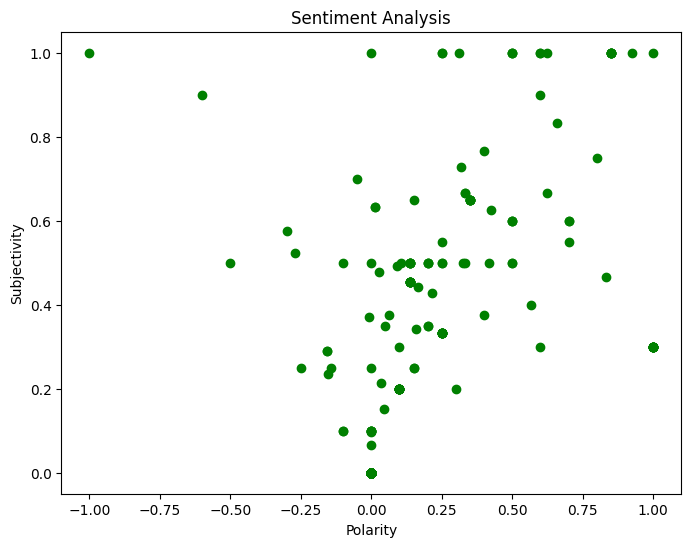

In [ ]:
# polarity and subjectivity plotting
# Size of the plot
plt.figure(figsize=(8,6))

for i in range(0, df_bcl.shape[0]):
    plt.scatter (df_bcl['Data_Polarity'][i],  df_bcl[ 'Data_Subjectivity'][i], color='Green' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

<Axes: >

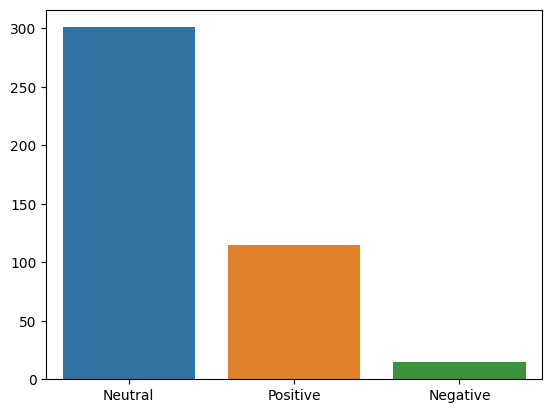

In [ ]:
category_counts = df_bcl["Data_Analysis"].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)

<Axes: xlabel='Data_Polarity', ylabel='Data_Subjectivity'>

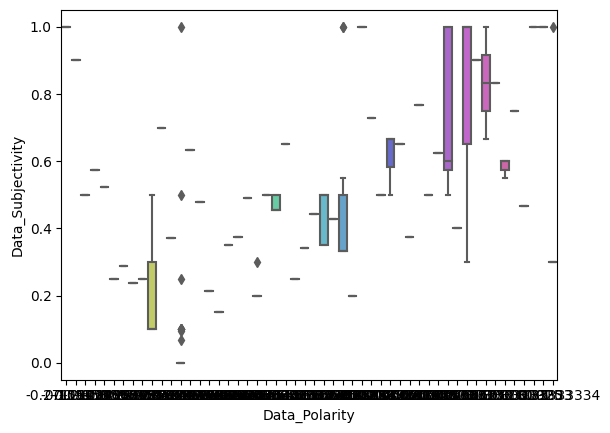

In [ ]:
sns.boxplot(x='Data_Polarity', y='Data_Subjectivity', data=df_bcl, palette='hls')

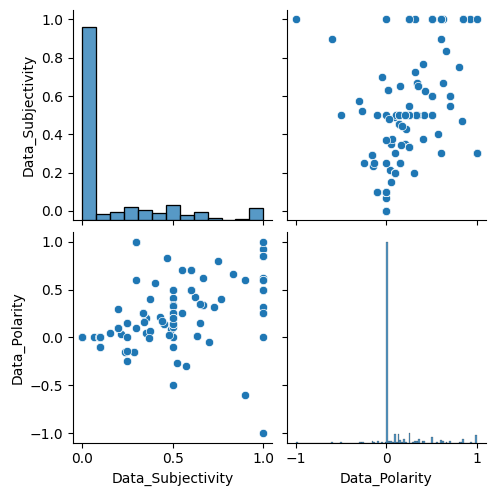

In [ ]:
sns.pairplot(df_bcl)

<Axes: xlabel='Data_Subjectivity', ylabel='Data_Polarity'>

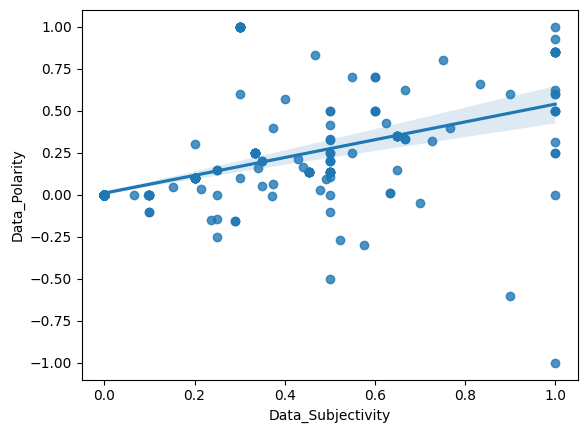

In [ ]:
sns.regplot(x='Data_Subjectivity', y='Data_Polarity', data=df_bcl, scatter=True)

In [ ]:
Data_Polarity = df_bcl.Data_Polarity
new_df = df_bcl.drop(columns=['User','Comment','Data_Polarity','Data_Analysis'])



In [ ]:
new_df.head()

,Data_Subjectivity
0,0.5
1,0.5
2,0.0
3,0.6
4,0.5


In [ ]:
Data_Polarity.head()

0    0.136364
1    0.136364
2    0.000000
3    0.500000
4    0.136364
Name: Data_Polarity, dtype: float64

In [ ]:


# Linear regression Model Y = m * X + b (m is coefficient and b is intercept)
reg = linear_model.LinearRegression()
reg.fit(new_df,Data_Polarity)

LinearRegression()

In [ ]:
reg.coef_

array([0.52990507])

In [ ]:
reg.intercept_

0.009649970283294104

In [ ]:
reg.predict([[0.5]])



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.27460251])

In [ ]:
reg.predict([[0.55]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.30109776])

In [ ]:
reg.predict([[0.625]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.34084064])

In [ ]:
reg.predict([[0.65]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.35408827])

In [ ]:
y_true = [0.1364,0.7000,0.4250,0.3500]
y_pred = [0.2746, 0.3011, 0.3408, 0.3541]

y_true=np.array(y_true)
y_pred=np.array(y_pred)


In [ ]:
y_pred.ndim

1

In [ ]:
r2_score(y_true, y_pred)

-0.13992978239850817

In [ ]:
R= (( r2_score(y_true, y_pred)))**2


In [ ]:
print(R)

0.01958034400209385


CONCLUSIONS:


1.  To create a DataBase for make a Sentimental analisys, we chose the social network Reddit,they allow us to take  data from their forums.
2.   We  crearted a account like dovelopers making the App  with name **My APP Wed Analytic**,  a ID Client and client secret code.
3.   We take the data from the forum called 'solotravel' collecting the the 431 comments throught the last month, these comments are about the next keywords: 'city', 'live' and 'best'.
4.  Into the code before  we will be getting the Database, we make a setimental analisys comparing two libreries, the libriary Vader vs Libriary TextBlob with similars outputs, this is the sample:
    

*   Over all Sentiment of Topic by TextBlob : {'negative': 3, 'positive': 30, 'neutral': 6}.

*   Over all Sentiment of Topic by VADER : {'negative': 0, 'positive': 28, 'neutral': 11}.


5. We created a DataFrame called 'Best_Cities_Live.csv' with two variables (user and comment) and 431 rows, this data base we used it to make the sentimental analisys in the way that the Dr. Patel tought us in class.
   
5. Graphing a scatter plot   subjectivity vs polarity using library  Matplot, where  we fund that most of the comment tend to be neutral about the topic.
6.   Graphing a Histogram plot   Comment's number vs polarity using the library Seaborn, where  we fund that most of the comment tend to be neutral about the topic
7.  With  library Seaborn we created a histogram and scatterplot for subjectivity vs polarity and  histogram and scatterplot for polarity vs subjectivity, showing the most of the comentarias have neutral opinions with high subjetivity score.

8.   At ther end, we make a liner regression model using the library  sklearn for  polarity vs subjectivity, and we run several valuas and generarate the coffiecient of regression and correlation.












Sources:


*   (n.d.). Creating statistical data graphics. Colab. https://colab.research.google.com/drive/1uLrGctQnfOa6114Uy_f7WhjBstj8OsCH#scrollTo=FNOOvG6jsy4n
* praw.readthedocs.io (n.d.). Praw Documentation. https://praw.readthedocs.io/en/stable/getting_started/quick_start.html

*   medium (n.d.). What Are the Different Types of Sentiment Analysis ? Https://Medium.com/. https://medium.com/nerd-for-tech/what-are-the-different-types-of-sentiment-analysis-808f36ef89ee
* towardsdatascience (n.d.). Automate Sentiment Analysis Process for Reddit Post: TextBlob and VADER. Https://Towardsdatascience.com/. https://towardsdatascience.com/automate-sentiment-analysis-process-for-reddit-post-textblob-and-vader-8a79c269522f

*   towardsdatascience (n.d.). Sentiment Analysis using TextBlob. Https://Towardsdatascience.com/. https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524






